# Insights from StarWar survey

Scenario: While waiting for __Star Wars: The Force Awakens__ to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: __does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?__

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses for all, and now we will clean it to see what's the hidden insights of this survey: __Are the StarWar's fan feel that The Empire Strikes Back is the best of all series?__

To clearly, __the Episode: The Empire Strikes Back__ is created and introduced __from 1980's__, and while the team FiveThirtyEight created this survey (2015s'), there are total 4 episode is introduced after The Empire Strikes Back. Our task is _find the insight from this survey data to answer the question that team FiveThirtyEight interest_: we can accept it or reject it depend on the data's result we have. The conclusion at the end of this project will be the final answer for the team.

Because we will work with csv file, but sometime we don't know what's that's file encoding? So, we will make a function to check the file encoding before we load in DataFrame.

In [196]:
# pip install chardet

In [197]:
## Check the file encoding:

from chardet.universaldetector import UniversalDetector

def detect_encode(file_name):
    
    detector = UniversalDetector()
    for item in open(file_name, 'rb'):
        detector.feed(item)
        if detector.done: break
        detector.close()
        print(detector.result)

Now let's download the file into our local and check the encoding of this.

In [198]:
# # Download the file:

# import opendatasets as od
# page='https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
# od.download(page)

In [199]:
## Check the encoding:
# detect_encode('StarWars.csv')

The encoding of file is in `Windows-1252`, so we will pass this encoding name into function call our DataFrame, and check file the final times to sure everything is OK.

In [200]:
## Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [201]:
## Load data in:
starwar = pd.read_csv('StarWars.csv', encoding='Windows-1252', delimiter=',')
starwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

Let's see a few records to know the data more clearly:

In [202]:
# Setting for maximum columns = 60
pd.set_option('display.max_columns',60)

# Check the first 5 records:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can see the structre of this survey like this:
- On the top index column: 9 question in total, 5 field is personal information. In 9 question:
1. From the 3rd question: The attendance have more than 1 selection, co-responde with each filter menu of question
- Behind the index column is the menu filter with the suggest answer, the attendance fill with fixed answer like: YES, NO, some adjective...
- The answer of attendance is actually at the 2nd record => We're considering to modify the index column + 1st record, or somehow to make column more clean.

# Clean data

__1. Handle YES/NO columns__

We have two filed of YES/NO column:
- `Have you seen any of the 6 films in the Star Wars franchise?` (1st)
- `Do you consider yourself to be a fan of the Star Wars film franchise?` (2nd)

As each field can contains missing value (due to attendance reject to answer), we do the following:
1. Count the value of each filed: By the `df.info()` function we know the first filed is none of missing, but the 2nd has => we will count again to confirm
2. Convert YES/ NO to boolean: by `series.map()` function.

The process will be like the code block below.

In [203]:
# Count the unique value again:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [204]:
starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes         552
NaN         350
No          284
Response      1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [205]:
#Rename the column:
col_name = starwar.columns[0:3]
change_name = ['participant_id', 'watch_any', 'star_war_fan']
map_name = {}
for item_1, item_2 in zip(col_name, change_name):
    map_name[item_1] = item_2

starwar.rename(map_name, axis=1, inplace=True)

Skip thorugh the Respond records, we will convert the other value now:

In [206]:
# Convert the value to boolean:
yes_no = {'Yes':True, 'No':False}

col = ['watch_any',
      'star_war_fan']

for item in col:
    starwar[item] = starwar[item].map(yes_no, na_action='ignore')

In [207]:
# Check the result:
starwar['watch_any'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: watch_any, dtype: int64

In [208]:
starwar['star_war_fan'].value_counts(dropna=False)

True     552
NaN      351
False    284
Name: star_war_fan, dtype: int64

__2. Clean Check-box columns__

Everything seem OK, now let's take the next step with the next 6 question, we can see that:
- On the field `Which of the following Star Wars films have you seen? Please select all that apply.`, right below it is title film: `Star Wars: Episode I The Phantom Menace` with mean that the 1st question is about the attendance seen the Eposide 1 or not
- Next is the same, `Star Wars: Episode II Attack of the Clones`...
- Right behind these column is the answer with whether repeat the film title/ NaN (not seen answer).

With that said, we can do the following below:
1. Check the value contains in each field, modify the string if need
2. Convert the title film as TRUE, NaN as False
3. Rename column name: Exp: `Which of the following Star Wars films have you seen? Please select all that apply.` => `seen_1`

In [209]:
# Check the unique value on each field:
def check_value(df, start, end):
    col_check = df.columns[start:end]
    result = []
    for item in col_check:
        val = df[item].unique()
        result.append(val[0])
        if val[1] not in result:
            val[1] = np.nan
            result.append(val[1])
            continue
    return result


In [210]:
check_value(starwar,3, 9)

['Star Wars: Episode I  The Phantom Menace',
 nan,
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [211]:
# Convert the value to boolean:
convert_value = check_value(starwar,3,9)
mapper = {}
for name in convert_value:
    if len(str(name))==3:
        mapper[name] = np.nan
        continue
    mapper[name] = True
        

In [212]:
def convert_value(df, start, end):
    cols = df.columns[start:end]
    for i in cols:
        df[i] = df[i].map(mapper)
    return df[i]

In [213]:
convert_value(starwar,3,9)

0       True
1       True
2        NaN
3        NaN
4       True
        ... 
1182    True
1183    True
1184     NaN
1185    True
1186    True
Name: Unnamed: 8, Length: 1187, dtype: object

In [214]:
# Convert the name of column:
def convert_columns(df, start, end, str_, number):
    
    cols = df.columns[start:end]
    revert = []
    for i in range(1,number+1):
        revert.append('{}_{}'.format(str_,i))

    mapp = {}
    for old, new in zip(cols, revert):
        mapp[old] = new
    
    return df.rename(mapp, inplace=True, axis=1)
     

In [215]:
## Run the function
convert_columns(starwar, 3, 9, 'seen', 6)

In [216]:
## Check some records:
starwar.head()

,participant_id,watch_any,star_war_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


__3. Clean the ranking columns:__

Similary as the Check-box columns above, but now we don't need to cleaning as much as the Check-boxs field. Instead, we rename the column to be `ranking_n` and cast the value to be numeric type.

In [217]:
# Cast the value:
starwar[starwar.columns[9:15]] = starwar.loc[2:,starwar.columns[9:15]].astype('float')

In [218]:
# Check:
starwar[starwar.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [219]:
# Rename the columns:
# Convert the name of column:
convert_columns(starwar, 9, 15, 'ranking', 6)

In [220]:
## Check:
starwar.head()

,participant_id,watch_any,star_war_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


__4. Clean the favourable columns__

Like the structre of Check-boxs and Ranking field, the favourable field have these structre:
- On the top: From `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` to `Unnamed: 28` is the question, co-responed to:
1. `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` => `Han Solo`
2. `Unname: 16` => Luke Skywalker, and so on
- In the answer form, we can see: `Very favourably`,`Somewhat favorably`,`Unfamiliar`,`NA`

So, what we should do is:
- Change the column name first, to avoid loss actor name
- Check the unique value of these field, and
- Convert the adjective into 3 rank: A,B,C co-respone to 3 degree: `Very favourably`,`Somewhat favorably`,`Unfamiliar`, and of course, N/A is 'C'
- Keep the records of actor's name, because we will use these records to summarize data.

The convert process will be shown as code-block below.

In [221]:
# Get the columns name and the name of actor:
list_actor_name = starwar.iloc[0,15:29].values
actor_name = [] 
for ac_name in list_actor_name:
    names = (ac_name
                      .replace(' ','_')
                      .lower()
                      .strip())
    actor_name.append(names)

# modify the actor name:
old_name = starwar.columns[15:29]
mapp1 = {}
for od, nw in zip(old_name, actor_name):
    mapp1[od] = nw
starwar.rename(mapper=mapp1, inplace=True, axis=1)

# Check the result:
starwar.columns[15:29]

Index(['han_solo', 'luke_skywalker', 'princess_leia_organa',
       'anakin_skywalker', 'obi_wan_kenobi', 'emperor_palpatine',
       'darth_vader', 'lando_calrissian', 'boba_fett', 'c-3p0', 'r2_d2',
       'jar_jar_binks', 'padme_amidala', 'yoda'],
      dtype='object')

In [222]:
# Check the unique value in each field:
starwar['han_solo'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Han Solo                                         1
Very unfavorably                                 1
Name: han_solo, dtype: int64

We will do a little change of our process:
- The evaluate rank is: `Very favorably`, `Somewhat favorably`, `Neither favorably nor unfavorably`,`Unfamiliar`,`Somewhat unfavorably`, `Very unfavorably` => We will change our standardized rank as: 
1. 1: `Very favorably`
2. 2: `Somewhat favorably`
3. 3: `Neither favorably nor unfavorably (neutral)`
4. 4: `Unfamiliar` or NaN value (because in the decription, Unfamiliar equal to Unknow, can consider as missing value)
5. 5: `Somewhat unfavorably`
6. 6: `Very unfavorably`
- For records with NaN, we will count it as D rank

In [223]:
#Convert the value:
mapping = {'Very favorably':1, 'Somewhat favorably':2,'Neither favorably nor unfavorably (neutral)':3,
          'Unfamiliar (N/A)':4, 'Somewhat unfavorably':5, 'Very unfavorably':6}

colume = starwar.columns[15:29]
for mark in colume:
    starwar[mark] = starwar[mark].map(mapping, na_action='ignore')

In [224]:
#Check:
starwar['han_solo']

0       NaN
1       1.0
2       NaN
3       2.0
4       1.0
       ... 
1182    1.0
1183    1.0
1184    NaN
1185    1.0
1186    1.0
Name: han_solo, Length: 1187, dtype: float64

For the convenient of further step, we'll clear the first record, which is fill with only 'Respone'... and other guide syntax.

In [225]:
## Drop the first records:
starwar.drop(index=0,axis=0, inplace=True)


__5 .Clean other column:__

In [226]:
#Household column:
map_name_3 = {'Household Income':'income', 'Location (Census Region)':'location'}
starwar.rename(map_name_3, axis=1, inplace=True)

In [227]:
#Change value in household column:
income_dict = {"$50,000 - $99,999":"Lower Middle",
               "$25,000 - $49,999":"Middle",
               "$100,000 - $149,999":"Upper Middle",
               "$0 - $24,999":"Low",
               "$150,000+":"High"}
starwar['income'] = starwar['income'].map(income_dict)
starwar['income'].head(5)


1             NaN
2             Low
3             Low
4    Upper Middle
5    Upper Middle
Name: income, dtype: object

In [228]:
# Fill the value again for the first record:

#Check data:
starwar.iloc[0,9:15].values

array([nan, nan, nan, nan, nan, nan], dtype=object)

In [229]:
#Replace data:
replace = [3, 2, 1, 4, 5, 6]

for item, i in zip(replace, range(9,15)):
    starwar.iloc[0, i] = item
    
#Check:
starwar.head()

,participant_id,watch_any,star_war_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,income,Education,location
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,Low,Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,I don't understand this question,No,NaN,No,Male,18-29,Low,High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,No,NaN,Yes,Male,18-29,Upper Middle,Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,1.0,2.0,2.0,5.0,1.0,6.0,2.0,3.0,1.0,2.0,2.0,6.0,2.0,2.0,Greedo,Yes,No,No,Male,18-29,Upper Middle,Some college or Associate degree,West North Central


__6. Filter missing data on dataset, modify & standardize:__

In [230]:
## Check the unique value:
#1. Create the list unique value
age_value = []
education_value = []
location_value = []

array = [-1, -2, -4]
for name in starwar.columns[array]:
    if name == 'Age':
        age_value.append(starwar[name].value_counts(dropna=False).sort_index())
    elif name == 'Education':
        education_value.append(starwar[name].value_counts(dropna=False).sort_index())
    else:
        location_value.append(starwar[name].value_counts(dropna=False).sort_index())
        
#2. Create the dic store data:
store = {}
list_data = [age_value, education_value, location_value]
list_name = ['Age', 'Education', 'Location']
for item, value in zip(list_name, list_data):
    store[item] = value

store

{'Age': [18-29    218
  30-44    268
  45-60    291
  > 60     269
  NaN      140
  Name: Age, dtype: int64],
 'Education': [Bachelor degree                     321
  Graduate degree                     275
  High school degree                  105
  Less than high school degree          7
  Some college or Associate degree    328
  NaN                                 150
  Name: Education, dtype: int64],
 'Location': [East North Central    181
  East South Central     38
  Middle Atlantic       122
  Mountain               79
  New England            75
  Pacific               175
  South Atlantic        170
  West North Central     93
  West South Central    110
  NaN                   143
  Name: location, dtype: int64]}

In [231]:
starwar[starwar['star_war_fan'].isnull()]

,participant_id,watch_any,star_war_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,income,Education,location
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,Low,Bachelor degree,West South Central
11,3.292638e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3.292635e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.292448e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,Low,High school degree,East South Central
35,3.292298e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,30-44,Lower Middle,Graduate degree,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,3.288422e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,> 60,Low,Some college or Associate degree,West South Central
1169,3.288410e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,30-44,High,Graduate degree,East North Central
1171,3.288403e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,45-60,NaN,Graduate degree,East North Central
1179,3.288395e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,18-29,NaN,Less than high school degree,West North Central


In [232]:
# Check the missing value of each field:
starwar[starwar['Age'].isnull()]

,participant_id,watch_any,star_war_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,income,Education,location
11,3.292638e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3.292635e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,3.291669e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,3.291650e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
97,3.291570e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,3.288512e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,3.288460e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1142,3.288459e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,3.288456e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the odd thing here:
- Some of answer said that they've seen at least 1 in 6 episode, but in the check-box for seen or not: they have not give their answer
- In the same records, they don't have any respond for any of question
- For `star_war_fan` column, all of records was missing is not have any answer

=> In order to get this odd thing clearly, we will use heatmap to check the missing value on this case, with _the missing value_ is show by __light color__, and the data pattern shown as __black color__

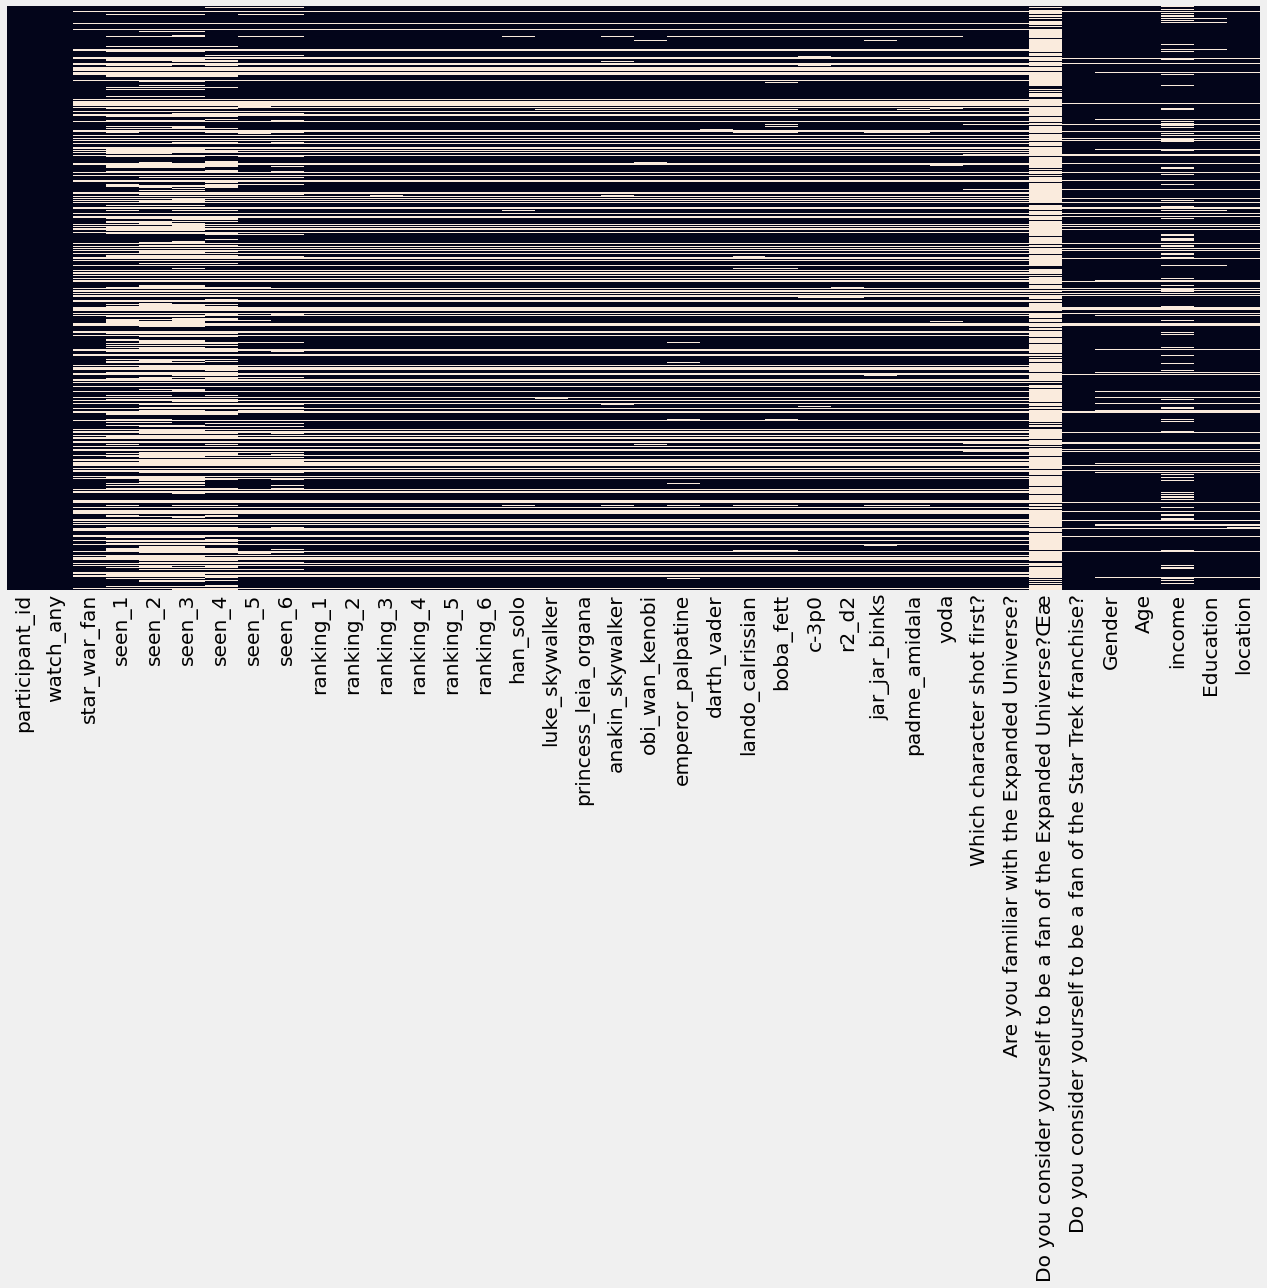

In [233]:
# Check missing value by heatmap graph:
#1. Import seaborn library:
import seaborn as sns      

# #3. Get the graph
def plot_null(df):
    # Modify the frame
    plt.figure(figsize=(20,10))
    # Identify the data
    data = df.isnull()
    #Plot
    sns.heatmap(data, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    
plot_null(starwar)

We can see that:
- We will isolate all of records that `star_war_fan` is missing because they could be contain some insights, we will use the data with `star_war_fan` is not missing
- To the field: `Do you consider yourself to be..`, we will convert all the missing value and `No` to be `False`, and analyze it, due to the missing pattern/ data pattern at two field have the signification different.
- We will remove all records with `Age` missing value, to the further analysis


In [234]:
# Use the dataset without missing at `star_war_fan`:
starwar = starwar[lambda x:x['star_war_fan'].notnull()]

In [235]:
# Remove the missing value at Age field:
starwar.dropna(subset=['Age'], inplace=True)

For the `Education` field, we can see the missing case almost same the `Age`, and we have get rid of almost these missing value. With the remain missing, we'll find the correlation between `Age` field and `Education` field, and then fill with the co-respone of `Age` value.

For the `Household Income`, we will put it later.

In [236]:
# Find the correlation of `Age` and `Education` field:
col_c = ['Age', 'Education']
print(starwar[col_c].notnull().corr())

# Find the value of Education co-respond with `Age`:
starwar[col_c][starwar['Education'].isnull()]

           Age  Education
Age        NaN        NaN
Education  NaN        1.0


,Age,Education
25,18-29,NaN
33,18-29,NaN
415,45-60,NaN
929,> 60,NaN


Since for correlation between 2 field `Age` and `Education` is None (and for `Location` too) => It's better not to fill in, considering by the size of missing value is 10 records of `Education`, and the number of records remain after delete these 10 case is not have large effect

=> Let's delete these missing value at `Education` too, and we will delete out in `Location` if any.

In [237]:
#Check the `Location` missing value:
print(starwar.iloc[:,-1].isnull().sum())

# Delete the missing record in `Education`:
starwar.dropna(subset=['Education'], inplace=True)

2


In [238]:
# Delete the missing record in `Location`:
starwar.dropna(subset=[starwar.columns[-1]], inplace=True)

In [239]:
# Check for the missing value at 3 field we modify:
num = [-1, -2, -4]
order = starwar.columns[num]

starwar[order].isnull().sum()

location     0
Education    0
Age          0
dtype: int64

The last cleaning on this chapter is for `Gender`, but if look back the missing value detect graph, we get the observe that almost the missing records in `Age` is in `Gender` too; so, for the remain missing value (if any), we can get rid of it now without worry about the loss of data.

In [240]:
# Check the missing value at `Gender`:
starwar['Gender'].isnull().sum()

0

Luckily, the supposing was True, all the missing value in `Gender` was blown away along with `Age` when cleaning `Age` field. Now, let's jump to analysis by:
- Education, age, Location (first, to expand the analysis result for the ranking of each episode above)
- Gender

In [241]:
#Change value column at `Education`:
education_dict = {'Bachelor degree':'Bachelors',
                  'Some college or Associate degree':'Diploma',
                  'Graduate degree':'Masters',
                  'High school degree':'High School',
                  'Less than high school degree':'Primary School'}
starwar['Education'] = starwar['Education'].map(education_dict)

# About the ranking of StarWar's fan for each episode & for Episode V

__1: Rating overview__

First, we will check the overview ranking of each Episode, and what's the percentage for each episode that StarWar's fan rating.

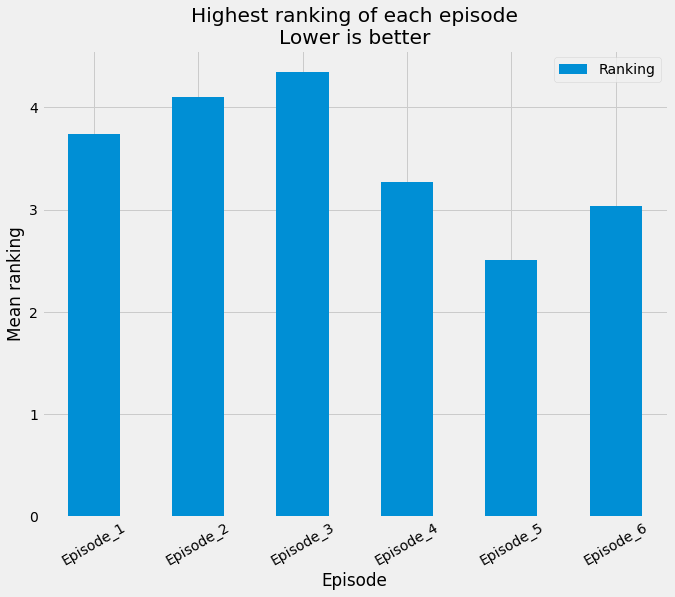

In [242]:
## Find the mean ranking:
#1. Create a new dataframe of ranking
cols_ranking = starwar.columns[9:15]
rank = starwar.copy()[cols_ranking]

#2. Compute the mean:
mean_rank = rank.mean()

#3. Plot the rank:
tick_name = []
for i in range(1,7):
    tick_name.append('Episode_{}'.format(i)) #Define the ticks name

mean_rank.plot.bar(legend=True, label='Ranking', rot=30)
plt.xticks(ticks=range(0,6), labels=tick_name)
plt.xlabel('Episode')
plt.ylabel('Mean ranking')
plt.gcf().set_size_inches(10, 8)

plt.title('Highest ranking of each episode\nLower is better')
plt.show()

We want to confirm the percentage among StarWar's fan rating each Episode, before we expand some of other factor. So we will draw some bar graph to do this.

In [243]:
#Isolate the indicate who seen all 6 ep of movie:
seen_all = starwar[lambda x:(x[x.columns[3:9]].sum(axis=1))==6].copy()
print('The number of indcates who had seen all movie is {}'.format(seen_all.shape[0]))

The number of indcates who had seen all movie is 460


In [244]:
# Caculate the percentage of each film got 1 votes (love):
ep_name=['I The Phantom Menace','II Attack of the Clones','III Revenge of the Sith',
        'IV A New Hope','V The Empire Strikes Back','VI Return of the Jedi']
to_df = {}
for name, col_rank in zip(ep_name, seen_all.columns[9:15]):
    to_df[name] = round(((seen_all[col_rank]==1).sum()/starwar.shape[0])*100)
    
rat_df = pd.Series(to_df)

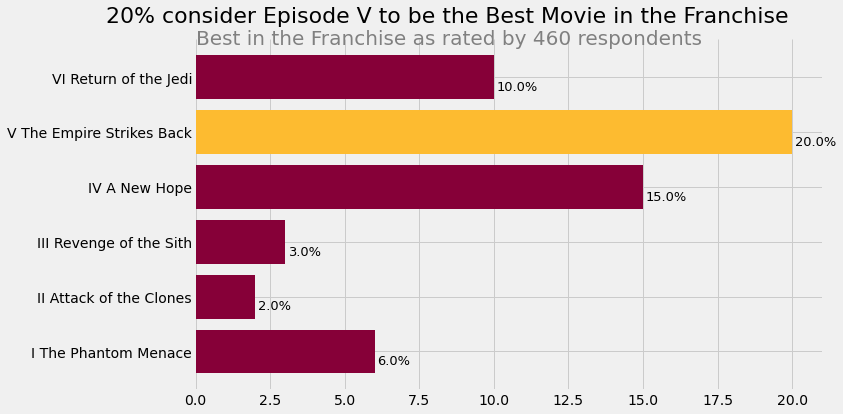

In [245]:
#Plot:
#1. Draw the frame:
fig, ax = plt.subplots(figsize=(10,6))
max_rat = ['#FDBB30' if rat_df[i]==rat_df.max() else '#860038' for i in range(6)]

#2. Plot the bar:
for pos in ['left', 'right', 'top', 'bottom']:
    ax.spines[pos].set_visible(False)
ax.barh(rat_df.index, rat_df, color=max_rat)

#3. Add annotate:
for p in ax.patches:
    value = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y()
    ax.annotate(value, (x,y), xytext=(3, 9),textcoords='offset points',size=13)
    
#4. Add title:
#Set Title
ax.text(-3,6,s="{:.0f}% consider Episode V to be the Best Movie in the Franchise".format(rat_df.max()),size=22)

#Set Sub-title
ax.text(0,5.6,s="Best in the Franchise as rated by {} respondents".format(seen_all.shape[0]),size=20,color='grey')
plt.show()

In [246]:
# Caculate the percentage of each film got votes 6 (unfavourable):
ep_name=['I The Phantom Menace','II Attack of the Clones','III Revenge of the Sith',
        'IV A New Hope','V The Empire Strikes Back','VI Return of the Jedi']
to_df2 = {}
for name, col_rank in zip(ep_name, seen_all.columns[9:15]):
    to_df2[name] = round(((seen_all[col_rank]==6).sum()/starwar.shape[0])*100)
    
rat2_df = pd.Series(to_df2)

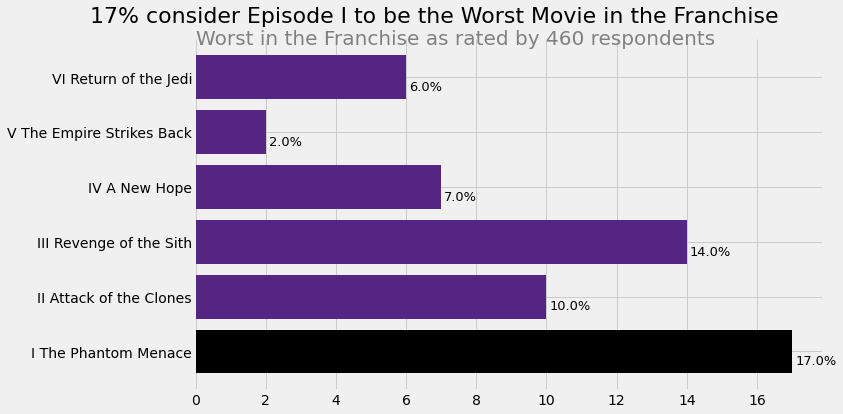

In [247]:
#Plot:
#1. Draw the frame:
fig, ax = plt.subplots(figsize=(10,6))
max_rat = ['#000000' if rat2_df[i]==rat2_df.max() else '#552583' for i in range(6)]

#2. Plot the bar:
for pos in ['left', 'right', 'top', 'bottom']:
    ax.spines[pos].set_visible(False)
ax.barh(rat2_df.index, rat2_df, color=max_rat)

#3. Add annotate:
for p in ax.patches:
    value = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y()
    ax.annotate(value, (x,y), xytext=(3, 9),textcoords='offset points',size=13)
    
#4. Add title:
#Set Title
ax.text(-3,6,s="{:.0f}% consider Episode I to be the Worst Movie in the Franchise".format(rat2_df.max()),size=22)

#Set Sub-title
ax.text(0,5.6,s="Worst in the Franchise as rated by {} respondents".format(seen_all.shape[0]),size=20,color='grey')
plt.show()

The last, we will check in fan who have not seen all movie, to check what's episode they like

In [248]:
#Isolate the data:
remain = starwar[lambda x:(x[x.columns[3:9]].sum(axis=1))!=6].copy()
print('The number of indcates who had not seen all movie is {}'.format(remain.shape[0]))

The number of indcates who had not seen all movie is 354


In [249]:
# Caculate the percentage of each film got 1 votes (love):
ep_name=['I The Phantom Menace','II Attack of the Clones','III Revenge of the Sith',
        'IV A New Hope','V The Empire Strikes Back','VI Return of the Jedi']
to_df3 = {}
for name, col_rank in zip(ep_name, remain.columns[9:15]):
    to_df3[name] = round(((remain[col_rank]==1).sum()/starwar.shape[0])*100)
    
rat_df3 = pd.Series(to_df3)

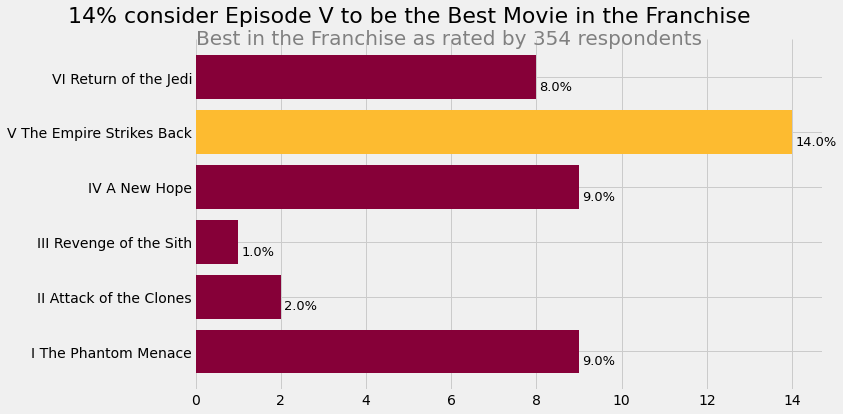

In [250]:
#Plot:
#1. Draw the frame:
fig, ax = plt.subplots(figsize=(10,6))
max_rat = ['#FDBB30' if rat_df3[i]==rat_df3.max() else '#860038' for i in range(6)]

#2. Plot the bar:
for pos in ['left', 'right', 'top', 'bottom']:
    ax.spines[pos].set_visible(False)
ax.barh(rat_df3.index, rat_df3, color=max_rat)

#3. Add annotate:
for p in ax.patches:
    value = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y()
    ax.annotate(value, (x,y), xytext=(3, 9),textcoords='offset points',size=13)
    
#4. Add title:
#Set Title
ax.text(-3,6,s="{:.0f}% consider Episode V to be the Best Movie in the Franchise".format(rat_df3.max()),size=22)

#Set Sub-title
ax.text(0,5.6,s="Best in the Franchise as rated by {} respondents".format(remain.shape[0]),size=20,color='grey')
plt.show()

Next, we will set a over view for all factor to see who's looks like StarWar fan.

Text(0.5, 0.9, 'Demographics of fan StarWar flim')

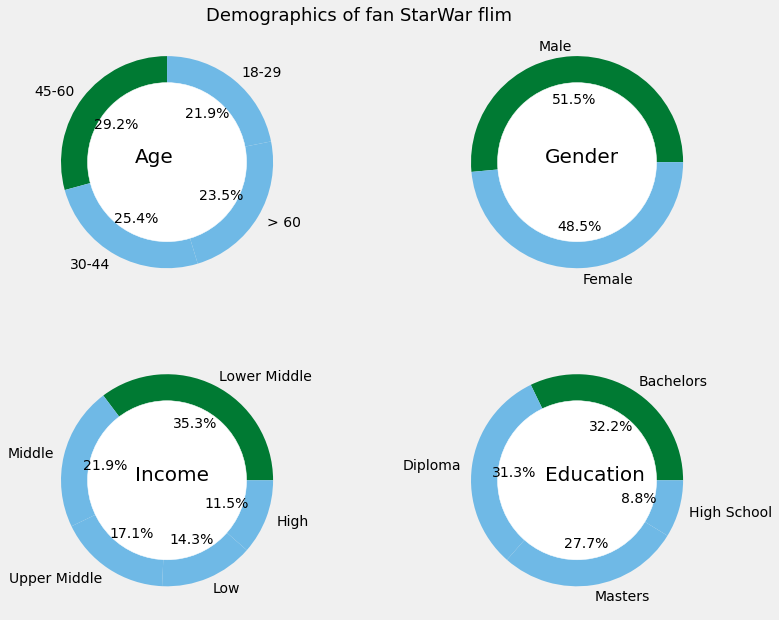

In [251]:
# Calculate the value:
sw_age = starwar['Age'].value_counts(normalize=True)
sw_gender = starwar['Gender'].value_counts(normalize=True)
sw_income = starwar['income'].value_counts(normalize=True)
sw_education = starwar[starwar['Education']!='Primary School']['Education'].value_counts(normalize=True)

#Draw the default circle:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for ax in [ax1, ax2, ax3, ax4]:
    circle = plt.Circle((0,0),0.75, color='white')
    ax.add_artist(circle)
    
#Make map color:
age_color = ['#007A33' if sw_age[i]==sw_age.max() else '#6fb9e6' for i in range(len(sw_age))]
gender_color = ['#007A33' if sw_gender[i]==sw_gender.max() else '#6fb9e6' for i in range(len(sw_gender))]
income_color = ['#007A33' if sw_income[i]==sw_income.max() else '#6fb9e6' for i in range(len(sw_income))]
education_color = ['#007A33' if sw_education[i]==sw_education.max() else '#6fb9e6' for i in range(len(sw_education))]

#Draw the pie donut:
ax1.pie(round(sw_age*100, 2), autopct='%1.1f%%', labels=sw_age.index, colors=age_color, startangle=90)
ax1.text(s ='Age', x=-0.3, y=0, size=20)

ax2.pie(round(sw_gender*100,2), autopct='%1.1f%%', labels=sw_gender.index, colors=gender_color)
ax2.text(s='Gender', x=-0.3, y=0, size=20)

ax3.pie(round(sw_income*100,2), autopct='%1.1f%%', labels=sw_income.index, colors=income_color)
ax3.text(s='Income', x=-0.3, y=0, size=20)

ax4.pie(round(sw_education*100,2), autopct='%1.1f%%', labels=sw_education.index, colors=education_color)
ax4.text(s='Education', x=-0.3, y=0, size=20)

#Define subtitle
plt.figtext(x=.5, y=.9, s='Demographics of fan StarWar flim', fontsize=18, ha='center', va='center')

__Conclusion 1:__ The StarWar's fan will likely have these properlity:
- Is `Male`, in term of `45-60` (although `30-44` is the second)
- Income in `Lower Middle` level (50,000 - 99,999 USD), and have education base in `Bachelors`

And, among StarWar's fan, all of them argreed that __Episode V is the most favourable series__. In addition, the series that almost StarWar's fan hate is Episode I.

__2: Discover the highest ranking Episode by `Age` + `Gender`__

We've look at the graph above and see what's episode is received the highest ranking __(as low as best)__ => Let's look behind the curtain, we want to know: 
- `Male` and `Female`, between each group of `Age`, __what's the group have the most attendance??__ => This result to determine the most result (bad or good) from what's group.
- __What's the average ranking point for the Episode__ that each group give to the Episode?? => This result can be use to answer one pattern for the ranking we got above in the bar chat.

In [252]:
#Check the 'gender' value:
starwar['Gender'].value_counts(dropna=False)

Male      419
Female    395
Name: Gender, dtype: int64

In [253]:
# Aggregate by 'Age'
age_group = starwar.copy().groupby('Age')

#Filter by `Male`:
age_male = age_group.apply(lambda x: x[x['Gender']=='Male'])
rank_by_male = age_male[age_male.columns[9:15]]
# Input sum ranking of each age group:
sum_rank_by_male = rank_by_male.reset_index().groupby('Age').agg(np.sum)
result = sum_rank_by_male['ranking_5']
        
#Filter by `Female':
age_female = age_group.apply(lambda x: x[x['Gender']=='Female'])
rank_by_female = age_female[age_female.columns[9:15]]
# Input sum ranking of each age group:
sum_rank_by_female = rank_by_female.reset_index().groupby('Age').agg(np.sum)
result_2 = sum_rank_by_female['ranking_5']

In [254]:
def plot_the_pie(series_1, series_2, df, title_1, title_2, col_name):
    
    # Define data for each group:
    group_1 = list(series_1)
    group_2 = list(series_2)

    # Create explode data:
    explodes = [0.2, 0, 0.3, 0]

    # Create auto pct funct:
    def get_pct(pct, data):
        result = int(pct / 100.*np.sum(data)) ##formula: percentage/100 * sum(data) = item in data
        return ("{:.1f}% \n {}".format(pct, result))
    # Create wedge properties:
    wd = {'linewidth': 1, 'edgecolor':'black'}
    # Create label:
    key = list(df[col_name].unique())

    # Plot the pie:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  
    # For male group  
    wedges, texts, autotexts = ax1.pie(x=group_1,
                     autopct= lambda pct: get_pct(pct, group_1),
                     explode = explodes,
                     wedgeprops=wd,
                     colors=['cyan','pink','violet','green'],
                     labels=key,
                     startangle=90)
    ax1.legend(wedges, key, title='Age',loc=6, bbox_to_anchor=[1,1]) #Set legend box
    plt.setp(autotexts, size = 12, weight ="bold")
    ax1.set_title('{}'.format(title_1)) # Set title
    
    # For female group
    wedges, texts, autotexts = ax2.pie(x=group_2,
                     autopct= lambda pct: get_pct(pct, group_2),
                     explode = explodes,
                     wedgeprops=wd,
                    colors=['cyan','pink','violet','green'],
                     labels=key,
                     startangle=90)
#     ax2.legend(wedges, key, title='Age', loc=6, bbox_to_anchor=[1,1])
    plt.setp(autotexts, size = 12, weight ="bold")
    ax2.set_title('{}'.format(title_2))
    plt.show()

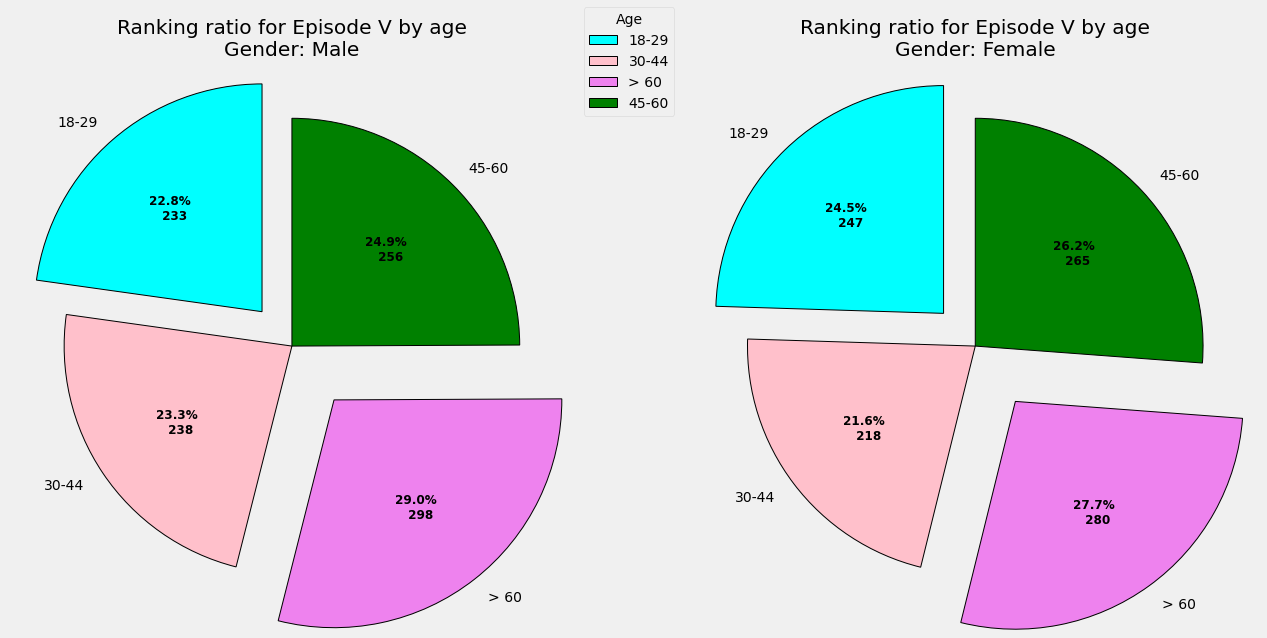

In [255]:
plot_the_pie(result, result_2, starwar, 
            'Ranking ratio for Episode V by age\nGender: Male', 'Ranking ratio for Episode V by age\nGender: Female',
            'Age')

Look at the graph, we can get the overview for our attendance:
- The mostly votes from the Senior __(above 60 years old)__, and we got the votes of men more than women
- The second one is from Tricenarian group __(45-60)__, but this times women's votes more than men
- The last one is for Teenage/Pre-middle age and Middle age group, with the raio votes is opposite of each other. 

After got the ranking ratio, we can focus on the average point that they are ranking for this Episode, and make the bar chart to see what's happend.

In [256]:
## Get the mean point of each gender:
#Male:
mean_rank_by_male = rank_by_male.reset_index().groupby('Age').agg(np.mean)
mean_1 = mean_rank_by_male['ranking_5']

#Female:
mean_rank_by_female = rank_by_female.reset_index().groupby('Age').agg(np.mean)
mean_2 = mean_rank_by_female['ranking_5']

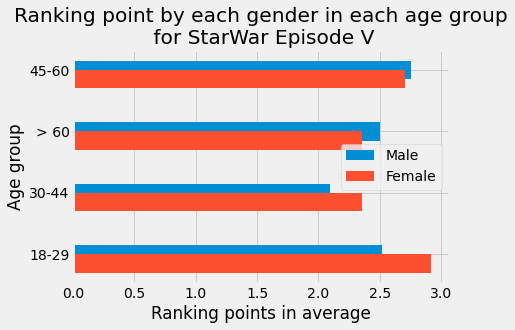

In [257]:
#Plot the bar chat:
plt.barh(y = list(starwar['Age'].unique()),width = list(mean_1), label='Male', height=0.3)
plt.barh(y = list(starwar['Age'].unique()),width = list(mean_2), align='edge', height=-0.3, label='Female')

plt.yticks(ticks=np.arange(0,4), labels=list(starwar['Age'].unique()))
plt.xlabel('Ranking points in average')
plt.ylabel('Age group')

plt.legend()
plt.title('Ranking point by each gender in each age group\n for StarWar Episode V')
plt.show()

- For `Male`: If we only mentioned to Episode V, `Male` in term of `30-44` seems love this episode the most; but if we compared all over episode, it's also `Male` but in term of `45-60`
- For `Female`: Since we know that `Male` have tend to like `StarWar` film more than `Female`, the ranking that above `2.5` isn't anythong suprised.

__3: Expand for `Location`, what's the region with the best ranking for this episode??__

In order to expand the result, we will discover it by what does the ranking ratio by `Location`? We will perform the two chart: _Pie chart_ for know the raking ratio distribution for each region, and _Bar chat_ to discover the average ranking point that each region has gave out to the episode. Our purpose is:
- Answer the question: __The mostly result come from what's region?__
- Evaluate the result (average ranking point): __Is the area with mostly result come from will affect the over-all result__?

In [258]:
## Aggregate data:
location = starwar.copy().groupby(starwar.columns[-1])

## Ranking ratio of each region:
sum_by_location = location.agg(np.sum)
to_piechart = sum_by_location['ranking_5']
## Average ranking point by each region:
mean_by_location = location.agg(np.mean)
to_barchart = mean_by_location['ranking_5']

In [259]:
def plot_the_pie_and_bar(data_to_piechart, data_to_barchart,
                        num_cols , jud_num, df,title_of_legend,titl_piechart,titl_xlabel,titl_barchart,
                         greater_or_less='greater'):
    
    # Get the data:
    piechart = list(data_to_piechart)
    barchat = list(data_to_barchart)
   # Define pce func for piechart:
    def get_func(pct, data):
        result = int(pct/100*np.sum(data))
        return ('{:.1f}% \n {} votes').format(pct, result)
    # Define wedge props:
    wd = {'linewidth':1, 'edgecolor':'black'}
    # Define labels:
    key = list(starwar[starwar.columns[num_cols]].unique())

    #Plot process:
    #1. Define the frame:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    #2. Plot the pie chart:
    wedges, texts, autotexts = ax1.pie(x=piechart,
                                  autopct= lambda pct:get_func(pct,piechart),
                                  
                                  
                                  startangle= 90,
                                  wedgeprops=wd)
    ax1.legend(wedges, key, title='{}'.format(title_of_legend), loc=6, bbox_to_anchor=[-0.3, 0.8])
    plt.setp(autotexts, size=12, weight='bold')
    ax1.set_title('{}'.format(titl_piechart))
    #3. Plot the bar chart:
    if greater_or_less=='greater':
        color_def = data_to_barchart>jud_num #To filter the region with ranking point greater than 2.5
        color_def_fil = color_def.map({True:'orange', False:'grey'})
        ax2.barh(y=np.arange(1,len(barchat)+1), width=barchat, align='center', color=color_def_fil)
    else:
        color_def_2 = data_to_barchart<jud_num
        color_def_fil_2 = color_def_2.map({True:'green',False:'grey'})
        ax2.barh(y=np.arange(1,len(barchat)+1), width=barchat, align='center', color=color_def_fil_2)
    ax2.set_yticks(np.arange(1,len(barchat)+1))
    ax2.set_yticklabels(key)
    ax2.set_xlabel('{}'.format(titl_xlabel))
    ax2.set_title('{}'.format(titl_barchart))

    plt.show()

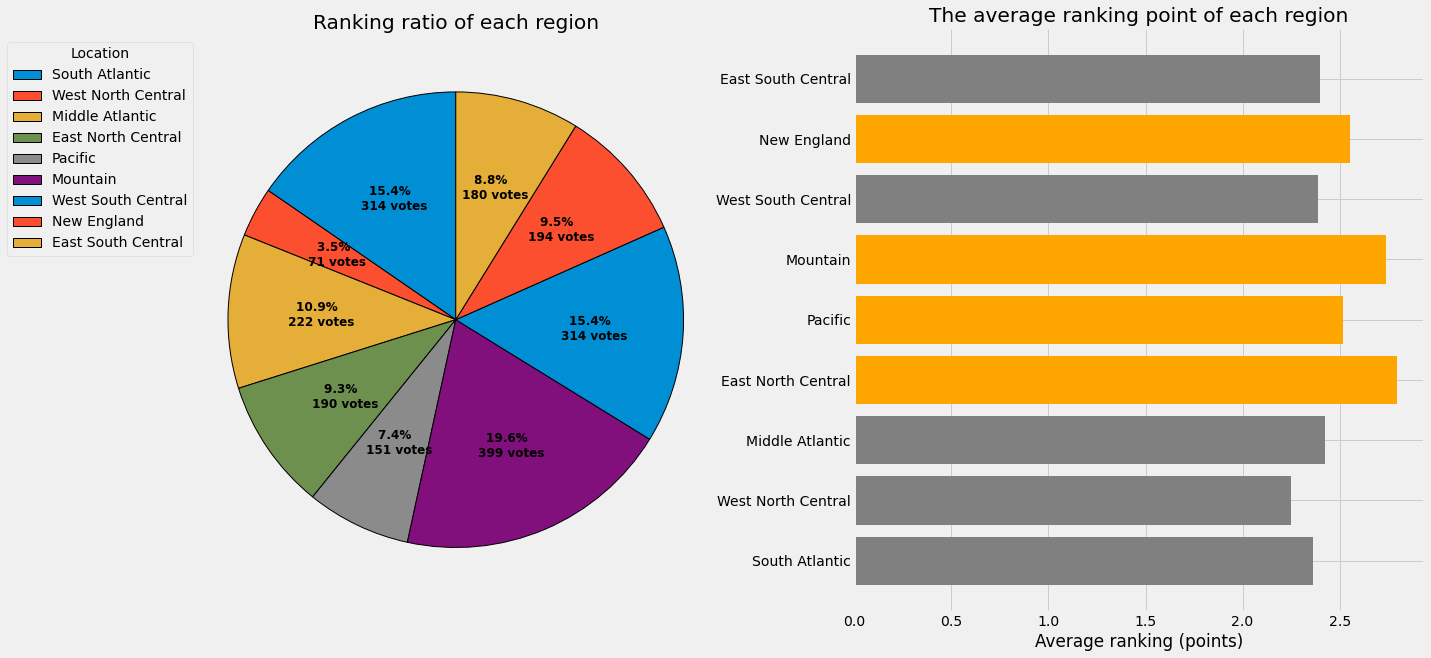

In [260]:
plot_the_pie_and_bar(to_piechart, to_barchart, -1, 2.5, starwar,
                     'Location', 'Ranking ratio of each region', 'Average ranking (points)',
                     'The average ranking point of each region', 'greater')

For the convient, the region with __average ranking point greater than 2.5__ had been marked as Orange color, and look at the result, we got:
- __The most votes__ from __the Mountain__ region, and sadly they __ranked it as greater than 2.5 points__. __The two second votes__ from __West South Central and South Atlantic__, though they __ranked it__ less than 2.5 points but __closely to 2.5 points__ (2.4 points) => This result somewhat can light out the reason of the current ranking for Eposide V of StarWar, __not as normal__, but somewhat __in certain region, it's just urrgh normal__
- The region give __the highest ranking__ only __West North Central__, but it place a last end position in the distribution ratio of number regions ranking (3.5%)

__CONCLUSION__:
- By `Age/Gender` : `Male` in term of `30-44` like the specific Episode V, meanwhile in group of `45-60` is fan of overall StarWar film. But there's one Episode that all fan not prefer, it's Episode I (17% votes is as worst episode.)
- By `Country`: approximately 50% among of regions not prefer this Episode. The region that likes this episode most is `West North Central` but it doesn't make sense due to the smallest scale of voting size.


# About the favourite characters: What's the taste of the fan Episode V? 

In [261]:
#Prepare data:
chars=['Han Solo','Luke Skywalker','Princess Leia','Anakin Skywalker',
       'Obi Wan','Emperor Palpatine','Darth Vader','Lando Calrissian',
       'Boba Fett','C-3PO','R2-D2','Jar Jar Binks','Padme Amidala','Yoda']
favour_dict = {}
unfavour_dict = {}
normal = {}
unfamiliar = {}

for char_name, rank in zip(chars, starwar.columns[15:29]):
    favour_dict[char_name] = round((((starwar[rank]==1)|(starwar[rank]==2)).sum()/(starwar.shape[0]))*100)
    unfavour_dict[char_name] = round((((starwar[rank]==5)|(starwar[rank]==6)).sum()/(starwar.shape[0]))*100)
    normal[char_name] = round(((starwar[rank]==3).sum()/(starwar.shape[0]))*100)
    unfamiliar[char_name] = round(((starwar[rank]==4).sum()/(starwar.shape[0]))*100)
    
# Output into dataframe:
ranking_df = pd.DataFrame(data=[favour_dict, unfavour_dict, normal, unfamiliar]).T
ranking_df.rename({0:'Favourable', 1:'Unfavourable', 2:'Normal', 3:'Unfamiliar'}, axis=1, inplace=True)
ranking_df = ranking_df.sort_values(by='Favourable', ascending=False)

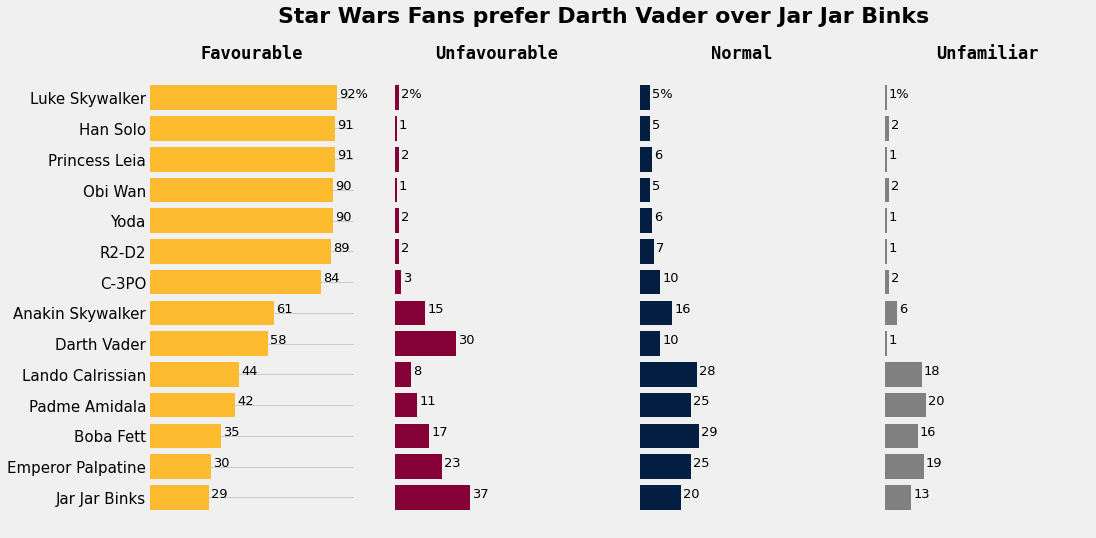

In [262]:
#Drwa the frame:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,8))
bar_colors = ['#FDBB30','#860038','#041E42','grey']

for i, ax in zip(range(4),[ax1, ax2, ax3,ax4]):
    for pos in ['left', 'right', 'top', 'bottom']:
        ax.spines[pos].set_visible(False)
    ax.barh(ranking_df.index, ranking_df[ranking_df.columns[i]], color=bar_colors[i])
    #Customize plot:    
    ax.tick_params(axis='y', left='False', labelsize=15)
    ax.set_xticks([])
    if ax!= ax1:
        ax.set_yticks([])
        
    #Annotate:
    j = 0
    for p in ax.patches:
        # Add '%' in text:
        if j==0:
            value = '{}%'.format(p.get_width())
        else:
            value = p.get_width()
        x = p.get_x() + p.get_width()
        y = p.get_y()
        ax.annotate(value, (x,y) , xytext=(2, -12), textcoords='offset points', size=13)
        j += 1
        
    #Set limits of each plot to standardize:
    ax.set_xlim([0,100])
    #Set title:
    ax.set_title(ranking_df.columns[i],weight='semibold',fontproperties='monospace',size=17)
    ax.invert_yaxis()
    
plt.suptitle("Star Wars Fans prefer Darth Vader over Jar Jar Binks",size=22,weight='bold')
plt.show()

__CONCLUSION__: 
1. The character with most loving from everyone is __`Luke Skywalker`__.
2. Follow the guidance fansign and character's relation story, both `Darth Varder` and `Jar Jar Binks` is __controversial__ character but it's a suprising that `Darth Varder` is more favourable than `Jar Jar Binks`. [This odds](https://screenrant.com/star-wars-jar-jar-binks-hatred-explained/) gradually become a characteristic to join the fan club.

# How about the seen votes for each episode?

Firstly, let's draw a simple Piechart to see the overview distribution of seen votes for each episode:

In [263]:
#Get data:
seen_result = starwar[starwar.columns[3:9]]
sum_seen = seen_result.sum()

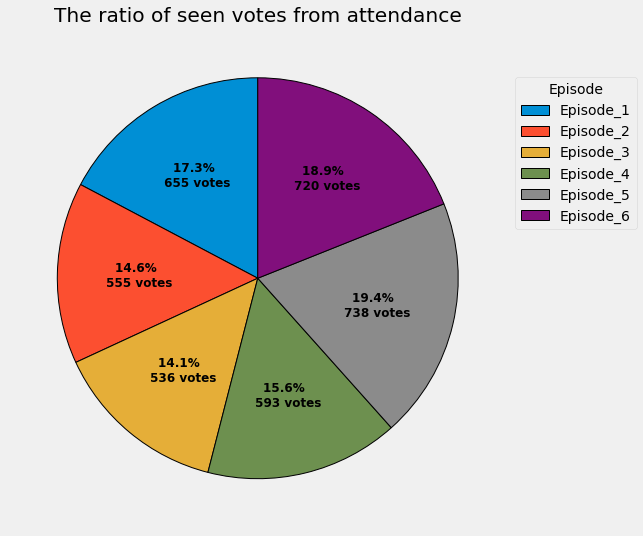

In [264]:
#Plot the pie:

#Define data:
to_piechart = list(sum_seen)
#Define autopct:
def get_pct(pct, data):
    result = int(pct/100*np.sum(data))
    return ('{:.1f}% \n {} votes'.format(pct, result))
#Define key:
key = ['Episode_{}'.format(i) for i in range(1,7)]
#Define the wedges:
wd = {'linewidth' : 1, 'edgecolor':'black'}

#Plot:
fig, ax = plt.subplots(figsize=(8,9))
wedges, texts, autotexts = ax.pie(x = to_piechart,
                                 autopct = lambda pct:get_pct(pct, to_piechart),
                                 wedgeprops = wd,
                                 startangle=90)
ax.legend(wedges, key, title='Episode', loc=6, bbox_to_anchor=[1.0, 0.75])
plt.setp(autotexts, size=12, weight='bold')
ax.set_title('The ratio of seen votes from attendance')

plt.show()

Not far as expect, __Episode V: The Empire Strikes Back is the expisode get the most votes as have seen by attendance__. Now we have some question to digger in:
- __Is the region with mostly votes for have seen will be the region with the worst ranking points?__
- In the fan group: _All of them have seen the episode_, __OR__, _they heard from anyone_ that this Episode so good, _and ranking it with good points??_
- __What age is the mostly seen this episode?__
- Among `Male` and `Female`, __what gender is mostly seen this episode?__

For the task above, we will:
- Aggregate data by `Age` and filter by `Gender`, take the sum votes of two group and make a Pie chart to see the overview.
- Call back the result data of average ranking points for each location, combine with the sum votes for have seen episode, make the graph of Pie chart and Bar chart to compare.
- For the fan group: Create a simple Bar chart to show how many people have seen this episode.

First, we will answer the first question: __Is the region with mostly votes for have seen will be the region with the worst ranking points?__

In [265]:
## Prepare data for pie chart:
location_2 = starwar.groupby(starwar.columns[-1])[starwar.columns[3:9]]

votes_piechart = location_2.agg(np.sum)['seen_5']

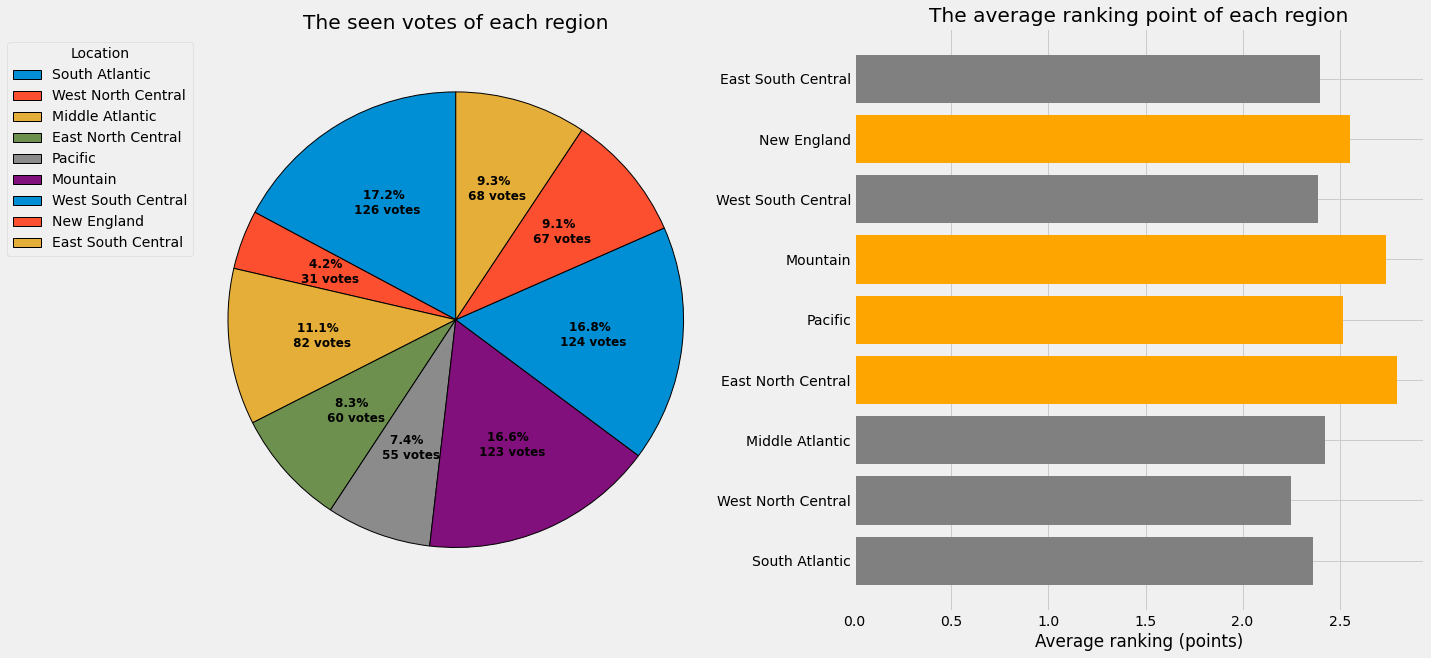

In [266]:
#To plot:
plot_the_pie_and_bar(votes_piechart, to_barchart,-1, 2.5, starwar,
                     'Location', 'The seen votes of each region', 'Average ranking (points)',
                     'The average ranking point of each region', 'greater')

The result is fairly to know:
- __The 1st votes from `South Atlantic`__, and luckily, though __the average ranking points__ isn't perfect but __not over than 2.5 points => this region still have some favourable for this Episode__
- __The second one, `Mountain`__, but they not like that much this episode (>2.5 points)

Now, move to the next question: __What's `Age` range, or what's `Gender` mostly seen this episode, and what's the ranking they gave for this episode?__

In [267]:
#Prepare data for graph
#1. For Male:
seen_by_male = age_male[age_male.columns[3:9]]
# Input sum seen of each age group:
sum_seen_by_male = seen_by_male.reset_index(level=0).groupby('Age').agg(np.sum)
seen_votes_pie = sum_seen_by_male['seen_5']

#2. For Female:
seen_by_female = age_female[age_female.columns[3:9]]
# Input sum seen of each age group:
sum_seen_by_female = seen_by_female.reset_index(level=0).groupby('Age').agg(np.sum)
seen_votes_pie_female = sum_seen_by_female['seen_5']

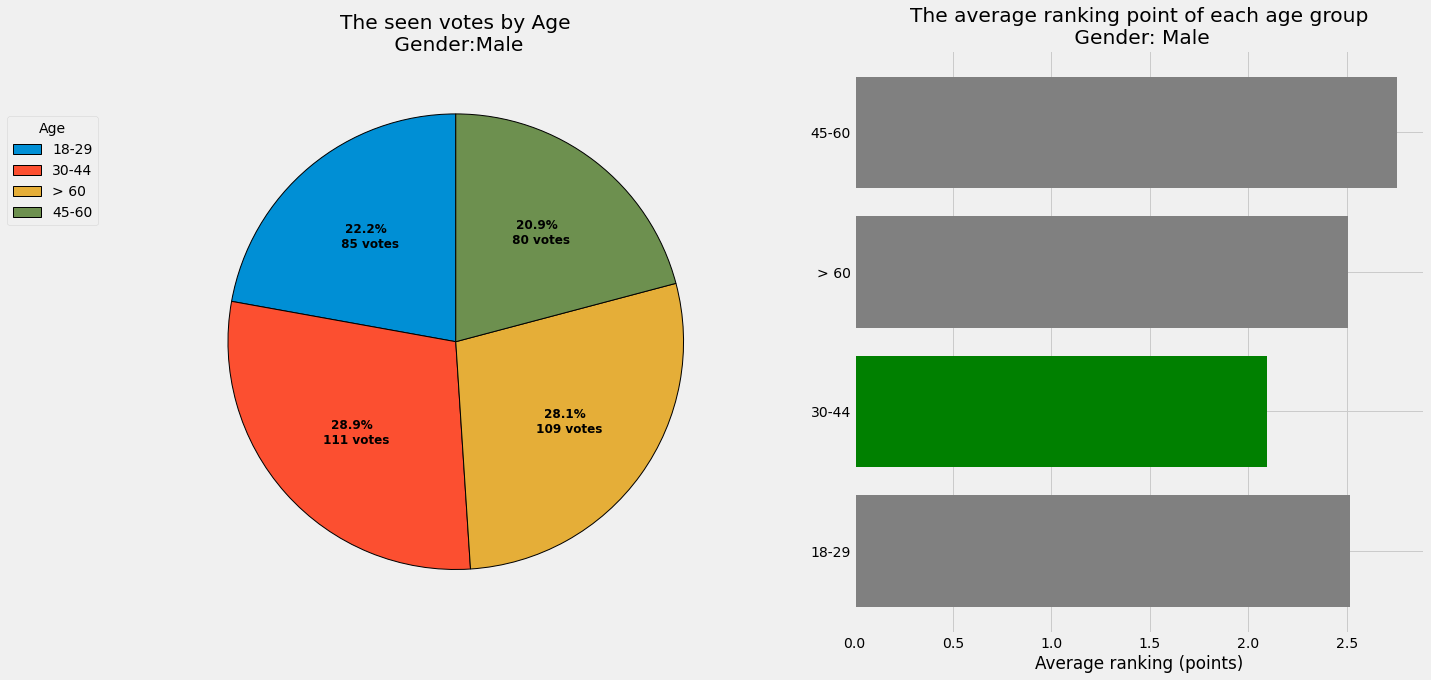

In [268]:
##Plot the data for Male:
plot_the_pie_and_bar(seen_votes_pie, mean_1,-4, 2.5, starwar,
                     'Age', 'The seen votes by Age\n Gender:Male', 'Average ranking (points)',
                     'The average ranking point of each age group\n Gender: Male', 'less')

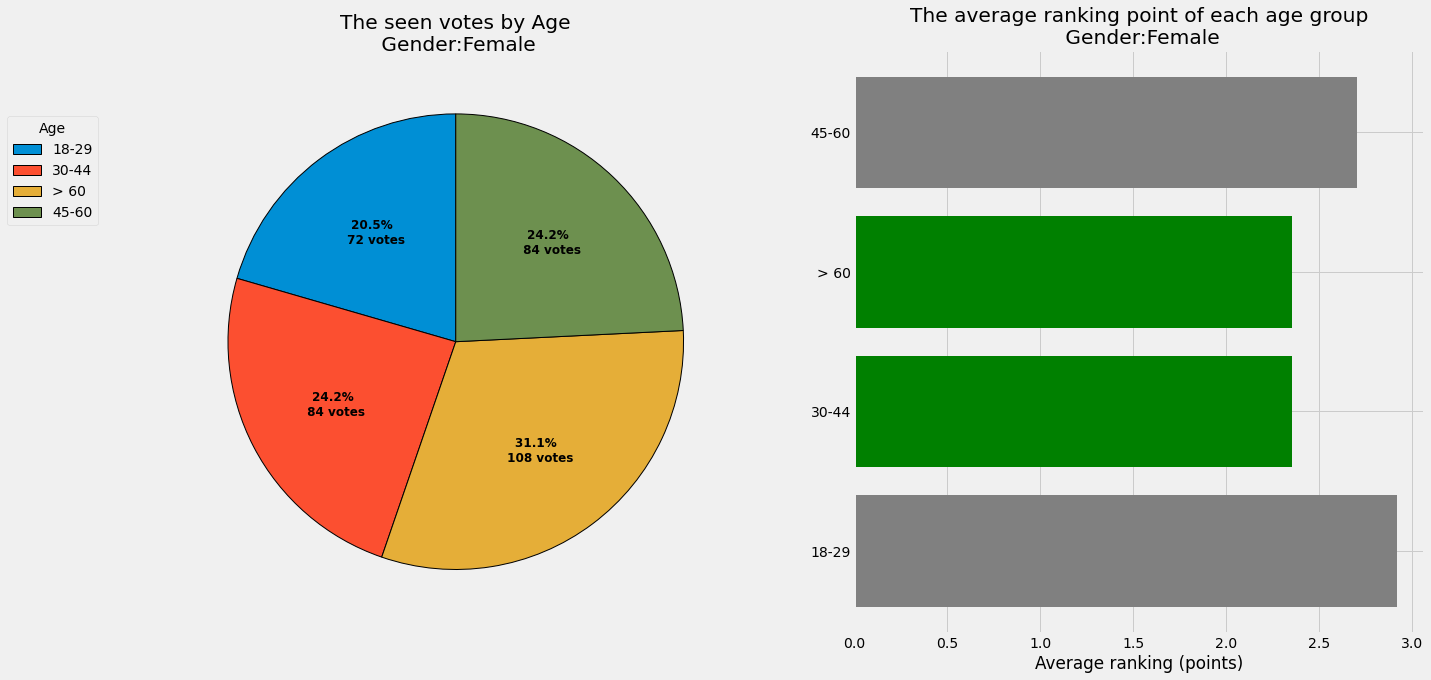

In [269]:
##Plot the data for Female:
plot_the_pie_and_bar(seen_votes_pie_female, mean_2,-4, 2.5, starwar,
                     'Age', 'The seen votes by Age\n Gender:Female', 'Average ranking (points)',
                     'The average ranking point of each age group\n Gender:Female', 'less')

Combine with the result depend on each age group, divide by `Gender` (named: `Ranking point by each gender in each age group\n for StarWar Episode V`), we get these observe:
- `Male` group: We can confirm again __our Mr. in age of `30-44` with good ranking points is the mostly group who have seen the Episode V__. In addition, our Senior People is the second one, but the ranking points isn't good as expect.
- `Female` group: __The mostly votes from our Mrs above 60 years old, with the good ranking points__, the second position have two range: `30-44` and `45-60`, but, the answer for question: Who's ranking good points for Episode V? => It's group age of `30-44`.
- We can get a funny conclusion: __The Women seem like Episode V than Men__, and we can confirm it right now:

In [270]:
## Prepare data for Overall Gender:
gender_check = starwar.copy().groupby('Gender')
sum_seen = starwar.copy().groupby('Gender')[starwar.columns[3:9]].agg(np.sum)
mean_seen = gender_check.agg(np.mean)

## To plot:
sum_seen_pie = sum_seen['seen_5']
mean_seen_bar = mean_seen['ranking_5']

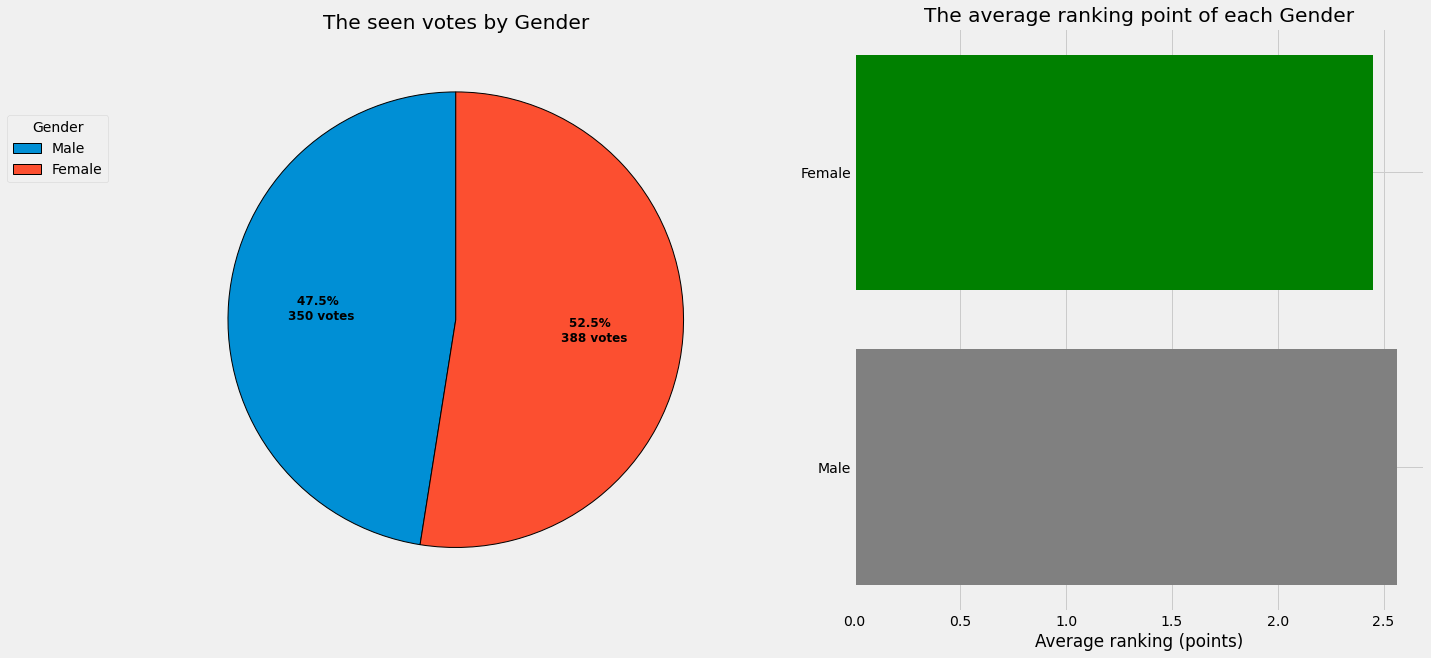

In [271]:
#Plot:
plot_the_pie_and_bar(sum_seen_pie, mean_seen_bar,-5, 2.5, starwar,
                    'Gender', 'The seen votes by Gender',
                    'Average ranking (points)',
                     'The average ranking point of each Gender', 'less')

__CONCLUSION__:
1. __The Women seem like Episode V: The Empire Strikes Back than Men__
2. __The mostly age group__ have seen this episode is: __`30-44` and for Men, and `above 60` for Women__
3.  __`South Atlantic`__ is the region that got mostly number of people have seen this episode, in other words, __Episode V is popular at `South Atlantic`__

## Outro: Fansite, fanchart...

We've went through all the main part of survey, now we're going to dive the funny part of survey: Member of fansite, fanchart... First of all, let's check the missing value at these field: `Do you consider yourself to be a fan of the Star Wars film franchise?`, `Do you consider yourself to be a fan of the Expanded Universe?Œæ`, `Do you consider yourself to be a fan of the Star Trek franchise?`

In [272]:
#Summary the missing value of these field:
num_co = [2, -6, -7]
col = starwar.columns[num_co]

statsic_missing = {}
for item in col:
    statsic_missing[item] = starwar[item].isnull().sum()
    
statsic_missing

{'star_war_fan': 0,
 'Do you consider yourself to be a fan of the Star Trek franchise?': 0,
 'Do you consider yourself to be a fan of the Expanded Universe?Œæ': 604}

We'll checking carefully at 2 fields have missing value:

In [273]:
# Store the unique value:
for_df = {}
num_col_2 = [2, -7, 30]
col_2 = starwar.columns[num_col_2]

for name in col_2:
    for_df[name] = starwar[name].value_counts(dropna=False)
    
df = pd.DataFrame(data = for_df)
df

,star_war_fan,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Are you familiar with the Expanded Universe?
False,275.0,NaN,NaN
True,539.0,NaN,NaN
NaN,NaN,604.0,NaN
No,NaN,112.0,604.0
Yes,NaN,98.0,210.0


Now we know what's the value inside each field, we do:
- Convert NaN as False, convert `Yes` as True and `No` as False
- Rename the columns, like:
1. `Do you consider.. Star Wars film franchise?` to be `star_wars_member`, `Do you consider... Star Trek franchise?` to be `star_trek_member`
2. `Are you familiar...` to be `know_expanded_ver`, the remain is `expanded_universe_mem`.

In [274]:
#Convert value:
convert_col_num = [30,-7]
convert_cols = starwar.columns[convert_col_num]

for cols in convert_cols:
    starwar[cols] = starwar[cols].map(yes_no, na_action='ignore')

In [275]:
starwar[starwar.columns[-7]].value_counts(dropna=False)

NaN      604
False    112
True      98
Name: Do you consider yourself to be a fan of the Expanded Universe?Œæ, dtype: int64

In [276]:
#2.  For field greater than 220:
col_mis_2 = starwar.columns[-7]

starwar[col_mis_2].fillna(False, inplace=True)
starwar[col_mis_2].notnull().sum()

814

In [277]:
## Check the final:
for_df_new = {}
for name in col_2:
    for_df_new[name] = starwar[name].value_counts(dropna=False).sort_index(ascending=True)
    
df2 = pd.DataFrame(data = for_df_new)
df2

,star_war_fan,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Are you familiar with the Expanded Universe?
False,275,716,604
True,539,98,210


In [278]:
#Check the last columns:
starwar[starwar.columns[-6]].value_counts(dropna=False)

Yes    411
No     403
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [279]:
#Convert:
col_fi = starwar.columns[-6]
starwar.loc[:,col_fi] = starwar[col_fi].map(yes_no)

#Check:
starwar[starwar.columns[-6]].value_counts(dropna=False)

True     411
False    403
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [280]:
#Rename the columns:
col_na_num = [-7, -6, 30]
col_na = starwar.columns[col_na_num]
name_rep = ['expanded_universe_mem','star_trek_member','know_expanded_ver']

map_rep = {}
for nw, od in zip(name_rep, col_na):
    map_rep[od] = nw

starwar.rename(map_rep, axis=1, inplace=True)
starwar.columns

Index(['participant_id', 'watch_any', 'star_war_fan', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2',
       'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'han_solo',
       'luke_skywalker', 'princess_leia_organa', 'anakin_skywalker',
       'obi_wan_kenobi', 'emperor_palpatine', 'darth_vader',
       'lando_calrissian', 'boba_fett', 'c-3p0', 'r2_d2', 'jar_jar_binks',
       'padme_amidala', 'yoda', 'Which character shot first?',
       'know_expanded_ver', 'expanded_universe_mem', 'star_trek_member',
       'Gender', 'Age', 'income', 'Education', 'location'],
      dtype='object')

In [281]:
#Check the final result value
for_df_final = {}
for name in name_rep:
    for_df_final[name] = starwar[name].value_counts(dropna=False).sort_index(ascending=True)
    
df3 = pd.DataFrame(data = for_df_final)
df3

,expanded_universe_mem,star_trek_member,know_expanded_ver
False,716,403,604
True,98,411,210


The data was cleaned, now let's consider about the analytic. There are some way to analysis:
- The `expanded_universe_mem` seems to low, no one like it? Or it have not get a properly advertise way to everyone?
- Who will likely be the fan of StarWar? Who will be likely be the fan of StarTrek?
- Are the fan of Episode V be StarWar member?  

Let's move to question 1: __The `expanded_universe_mem` seems to low, no one like it? Or it have not get a properly advertise way to everyone?__

In [282]:
#Aggregate data :
fan_age = starwar.copy().groupby('Age').agg(np.sum)
gender_group = starwar.copy().groupby('Gender')
fan_gender = gender_group.agg(np.sum)

#To plot:
expand_age_1 = fan_age['expanded_universe_mem']
expand_age_2 = fan_age['know_expanded_ver']
expand_gender_1 = fan_gender['expanded_universe_mem']
expand_gender_2 = fan_gender['know_expanded_ver']

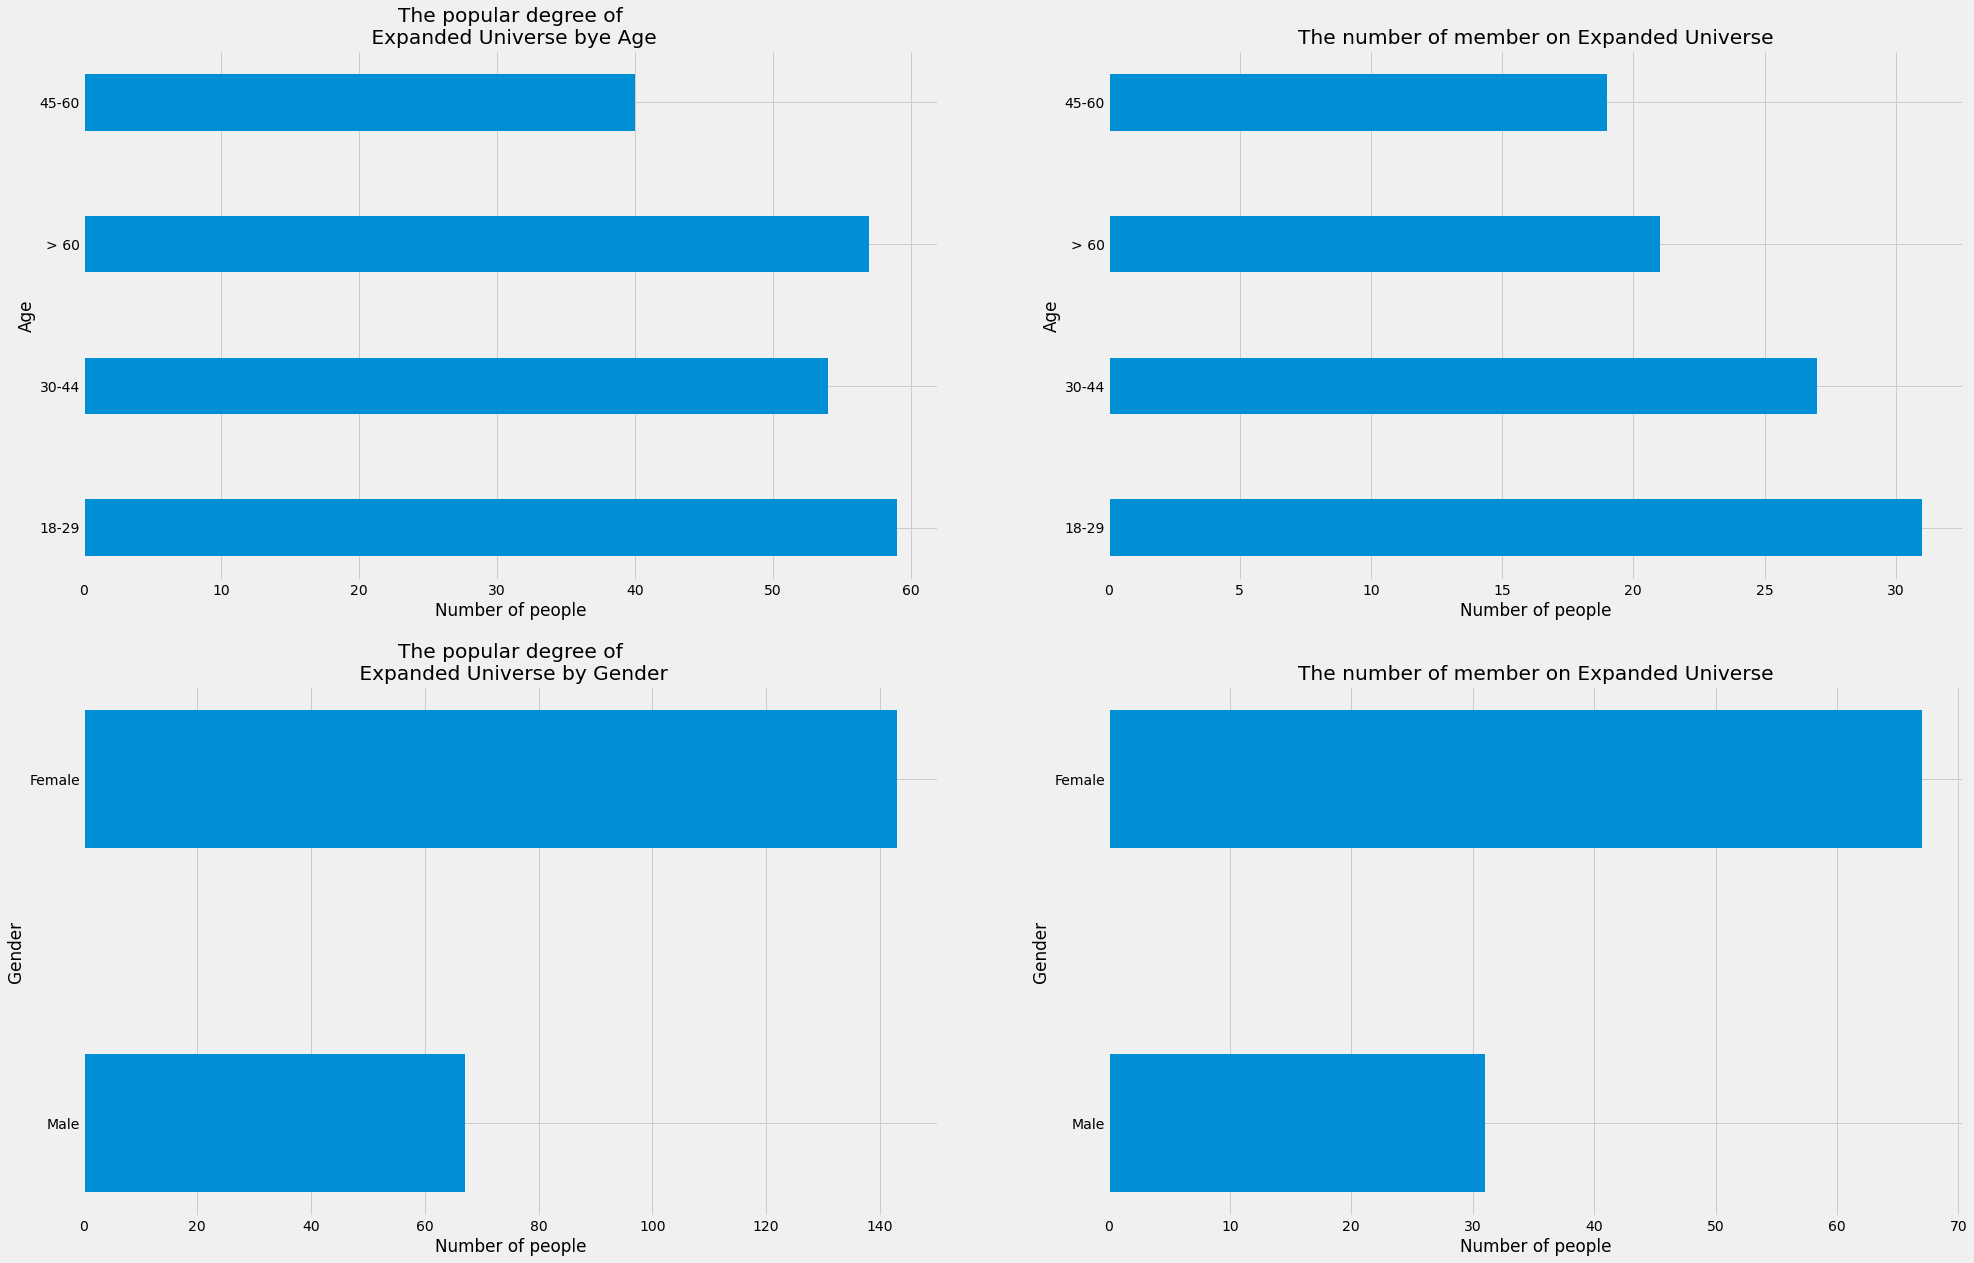

In [283]:
#To bar chart:

plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.barh(y=list(starwar['Age'].unique()),width=expand_age_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The popular degree of\n Expanded Universe bye Age')

plt.subplot(2,2,2)
plt.barh(y=list(starwar['Age'].unique()),width=expand_age_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on Expanded Universe')

plt.subplot(2,2,3)
plt.barh(y=list(starwar['Gender'].unique()),width=expand_gender_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The popular degree of\n Expanded Universe by Gender')

plt.subplot(2,2,4)
plt.barh(y=list(starwar['Gender'].unique()),width=expand_gender_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on Expanded Universe')

plt.show()

In the graph we observe:
- The `Expanded Universe` is __popular with `Female` than `Male`__, and popular with __age by `above 60` + `18-29`__, but with the number is smaller than overall records (150 vs 1034 records)
- The number member of `Expanded Universe` __mostly `Female` and people with age below 30 years old__

The countracy thing is, all of people in age of `18-29` is voted for Episode V with not good points but __they're good about activity like Fansign, Fanchart__, and `Expanded Universe` is one of the example.

So, we know that __the scale (and the popular) of this fansign is small__ (for _the less number who know it_, and _the less member active in_). Let's see have they joined in other fansign or have another reason??

In [284]:
## Prepare data for 'StarWar' fansign:
stw_age_1 = starwar.copy().groupby('Age')['star_war_fan'].agg(np.sum)
stw_age_2 = fan_age['star_trek_member']
stw_gender_1 = starwar.copy().groupby('Gender')['star_war_fan'].agg(np.sum)
stw_gender_2 = fan_gender['star_trek_member']


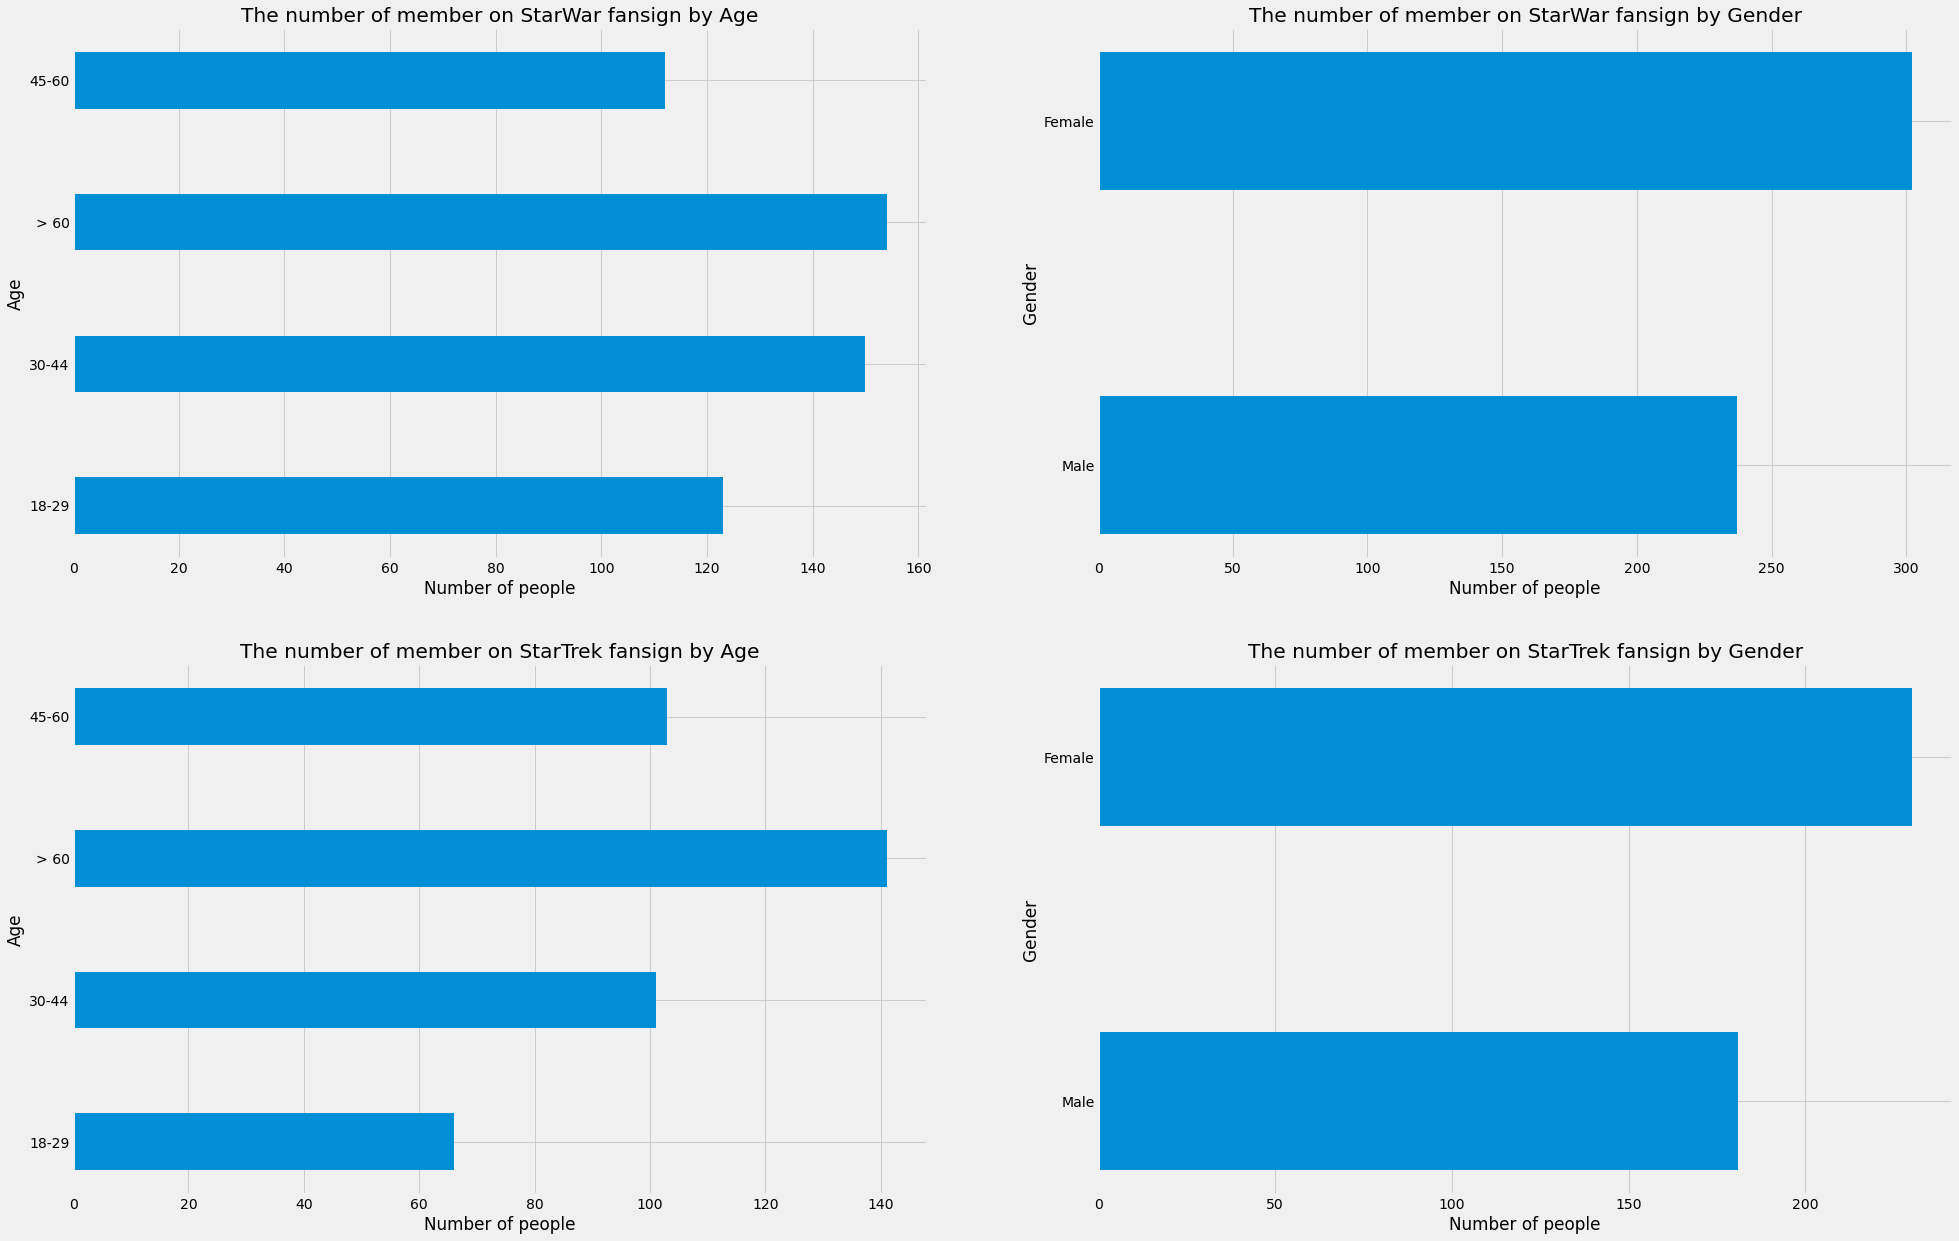

In [285]:
#Plot bar chart
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.barh(y=list(starwar['Age'].unique()),width=stw_age_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on StarWar fansign by Age')

plt.subplot(2,2,2)
plt.barh(y=list(starwar['Gender'].unique()),width=stw_gender_1, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on StarWar fansign by Gender')

plt.subplot(2,2,3)
plt.barh(y=list(starwar['Age'].unique()),width=stw_age_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Age')
plt.title('The number of member on StarTrek fansign by Age')

plt.subplot(2,2,4)
plt.barh(y=list(starwar['Gender'].unique()),width=stw_gender_2, height=0.4)
plt.xlabel('Number of people')
plt.ylabel('Gender')
plt.title('The number of member on StarTrek fansign by Gender')

plt.show()

We can see the larger scale of `StarWar` and `StarTrek` fan-sign than `Expanded Universe`, describe 1 pattern for the question: __The expanded_universe_mem seems to low, no one like it? Or it have not get a properly advertise way to everyone?__ => It's because almost people have join in `StarWar` and `StarTrek` franchise's fansign, so they have no tend to join on other team:
- __Almost member is `Female`__, for the both of franchise's fansign.
- __The most actively member is people in age `above 60`__

__CONCLUSION__: 
- __`Female` is the mostly member in every franchise's fansign__, and depend on which franchise, have mostly people with certain age range: __`Expanded Universe` is people in age range `18-29`__, both __remain is `above 60`__
- The reason of `Expand Universe` have small scale is __almost people have joined in `StarWar` and `StarTrek` franchise fansign, especially the strongest fansign is `StarWar` fansign__ => they have no interest to join on other team (__except people in `18-29` age range, they want to find the new thing__)

## Conclusion:
1. Episode V definily is __the most favourable among fan (>30%)__, by Fan votes
2. By `Country`in detail, `South Atlantic` is the region that seen the Episode V the most and their ranking score for this Episode is fairly good among other regions (17,2% seen the movie among 9 regions, with ranking score <2.5 points)
3. By `Gender`: overall StarWar episode, it's `Male` in term of `45-60`, but for only Episode V, it's `Female` in both term of `45-60` and `>60`
4. The Fan of StarWar have these properlity: `Male` in `45-60` (and `30-44`), have `Income` in range 50,000 to 99,000 USD; have education base in `Bachelors` 